In [1]:
from sentence_transformers import SentenceTransformer
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

model = SentenceTransformer('all-MiniLM-L6-v2')
titles=[
["Health", "Health care", "carer","Health professions","Healthcare","Health Care","Treatment needed","Healthcare Staff","Health care","Healthcare","Clinical","Pharmacy","Hospital","Hospital workforce","Healthcare Governance","Medicinal Care","NHS","Well being"],
["Law", "Criminal activities","police officer", "Criminal offences","Crime","Law Enforcement","Lawbreakers","Crime","Crime watch","Criminal Activies","Criminal offenses","Illegal","Assault","Prison terms","Crime Demographics","Cycle Crime","Crime","Social Concerns"],
["Animals","Sports nicknames","wild animals","Animals and birds","Animals","Football Talk","Animal lost","Teams","American football","NRL Teams","Wildlife","Animal","Animals","American football","Animal Movement","Farm Animals","Rugby","Sound Systems"],
["Cricket","International cricket", "news", "Cricket tournament", "Cricket", "World Cricket", "Question", "Victory Speech", "International cricket", "Discussions", "International competition", "Meeting", "Job", "Cricket", "Sports Communication", "Cricket Information", "Sport", "Social Presence"],
["Wet", "Environmental drainage", "pollution", "Adverse weather problems", "river management", "Water Services", "Water", "Managing Water", "Water works", "Waterboard Issues", "Water", "Liquidation", "Water", "Waterworks", "Water Infrastructure", "Weather Control", "Floods", "Environmental Concerns"],
["Compete", "Sporting controversy", "gta", "Sporting terms", "cycling", "Sports Information", "Various", "Dash Won", "The olympics", "Activities", "verbs", "Championship", "Car", "Right", "Sport Keywords", "American Football", "Cycling", "Deadlines"],
["Vehicle", "Tragedy", "services", "Moving catastrophes", "travel accidents", "Emergency Services", "Vehicle accident", "Emergency", "Bad news", "Travel Dangers", "Disasters", "Disaster", "Accidents", "Train services", "Transport Incidents", "Accident Information", "Accident", "News roundup"],
["Law", "Legal drama", "police officer", "Criminal offences", "criminal justice", "Justice System", "Law tried", "Justice System", "Court case", "Legal Case", "Criminal justice", "Danger", "Violence", "Crimes", "Criminal Justice", "Crime Information", "Criminal", "Imprisonment"],
["Boys names", "Sporting heroes", "first names", "Men’s names", "men's names", "Male Names", "Random names", "Lineage", "Male names", "Names", "Male names", "Names", "People's names", "Names", "Names", "Male Names", "Rugby Coach", "famous people"],
["Agriculture", "Agricultural crisis", "tractor", "Rural terms", "farming", "Agricultural Land", "grower", "Agricultural", "Farm land", "FARMING", "Agriculture", "Agriculture", "Rural", "Farming", "Agriculture", "Agricultural Weather Concerns", "Climate", "Countryside information"],
]

LDA_sum = 0
BERTopic_sum = 0
mean_similarities=[]

centroids = []

for i, title in enumerate(titles):
    embeddings = model.encode(title)
    centroid = np.mean(embeddings, axis=0)  # Calculate the mean to get the centroid
    centroids.append(centroid)
    

for i, title in enumerate(titles):
    embeddings = model.encode(title)
    similarity_matrix = cosine_similarity(embeddings)
    mean_similarity = np.tril(similarity_matrix).mean()
    mean_similarities.append(mean_similarity)
    print(f"The average semantic similarity within the {i}th topic is:", mean_similarity)
    
    
    if i in [3, 5, 6, 7, 9]:
        LDA_sum += mean_similarity
    else:
        BERTopic_sum += mean_similarity
    
LDA_average = LDA_sum / 5
BERTopic_average = BERTopic_sum / 5

print("LDA average is :", LDA_average)
print("BERTopic average is :", BERTopic_average)


The average semantic similarity within the 0th topic is: 0.2801127
The average semantic similarity within the 1th topic is: 0.28301078
The average semantic similarity within the 2th topic is: 0.24123906
The average semantic similarity within the 3th topic is: 0.23550083
The average semantic similarity within the 4th topic is: 0.24116065
The average semantic similarity within the 5th topic is: 0.19558665
The average semantic similarity within the 6th topic is: 0.23387094
The average semantic similarity within the 7th topic is: 0.28828374
The average semantic similarity within the 8th topic is: 0.3173004
The average semantic similarity within the 9th topic is: 0.31653288
LDA average is : 0.25395500659942627
BERTopic average is : 0.2725647211074829


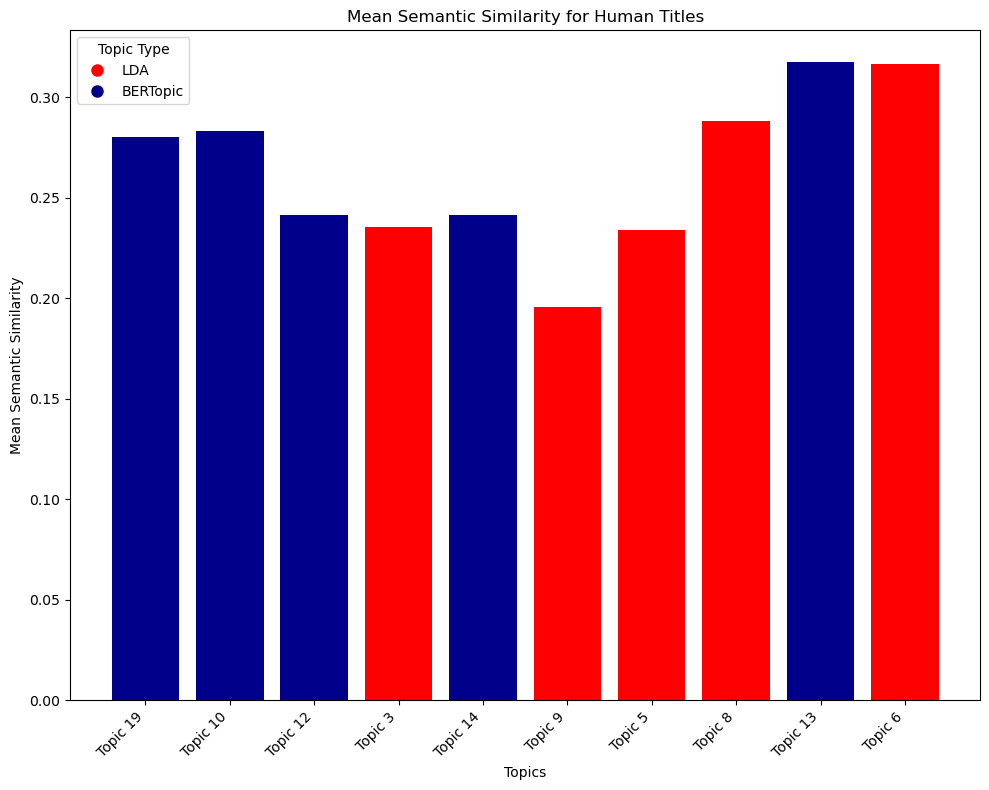

In [14]:
import matplotlib.pyplot as plt


topic_order = [19, 10, 12, 3, 14, 9, 5, 8, 13, 6]  
topics_descriptors = [f'Topic {i}' for i in topic_order]  
colors = ['darkblue' if i in [19, 10, 12, 14, 13] else 'red' for i in topic_order]

plt.figure(figsize=(10, 8))
plt.bar(topics_descriptors, mean_similarities, color=colors)
plt.xlabel('Topics')
plt.ylabel('Mean Semantic Similarity')
plt.title('Mean Semantic Similarity for Human Titles')
plt.xticks(rotation=45, ha='right')  # better visibility
plt.tight_layout()

# Legends for the graph
legend_labels = ["LDA", "BERTopic"]
legend_colors = ['red', 'darkblue']
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in legend_colors]
ax = plt.gca()  
ax.legend(legend_handles, legend_labels, title='Topic Type')

plt.show()



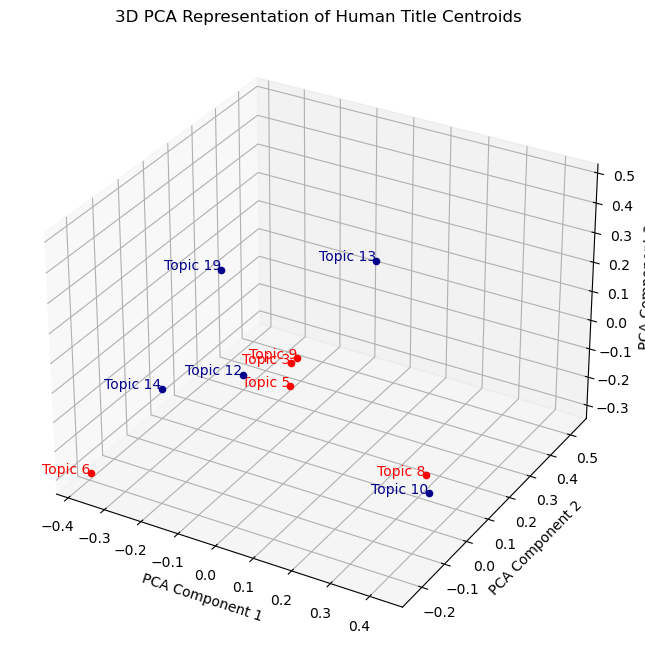

In [31]:
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D

# PCA Operation
pca = PCA(n_components=3)
reduced_centroids = pca.fit_transform(centroids)

#  3D scatter plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# labels
for i, topic_descriptor in enumerate(topics_descriptors):
    ax.scatter(
        reduced_centroids[i, 0], reduced_centroids[i, 1], reduced_centroids[i, 2],
        c=colors[i], marker='o'
    )
    ax.text(
        reduced_centroids[i, 0], reduced_centroids[i, 1], reduced_centroids[i, 2],
        topic_descriptor, color=colors[i], fontsize=10, ha='right'
    )

# Set labels and title
ax.set_xlabel('PCA Component 1')
ax.set_ylabel('PCA Component 2')
ax.set_zlabel('PCA Component 3')
ax.set_title('3D PCA Representation of Human Title Centroids')

plt.show()


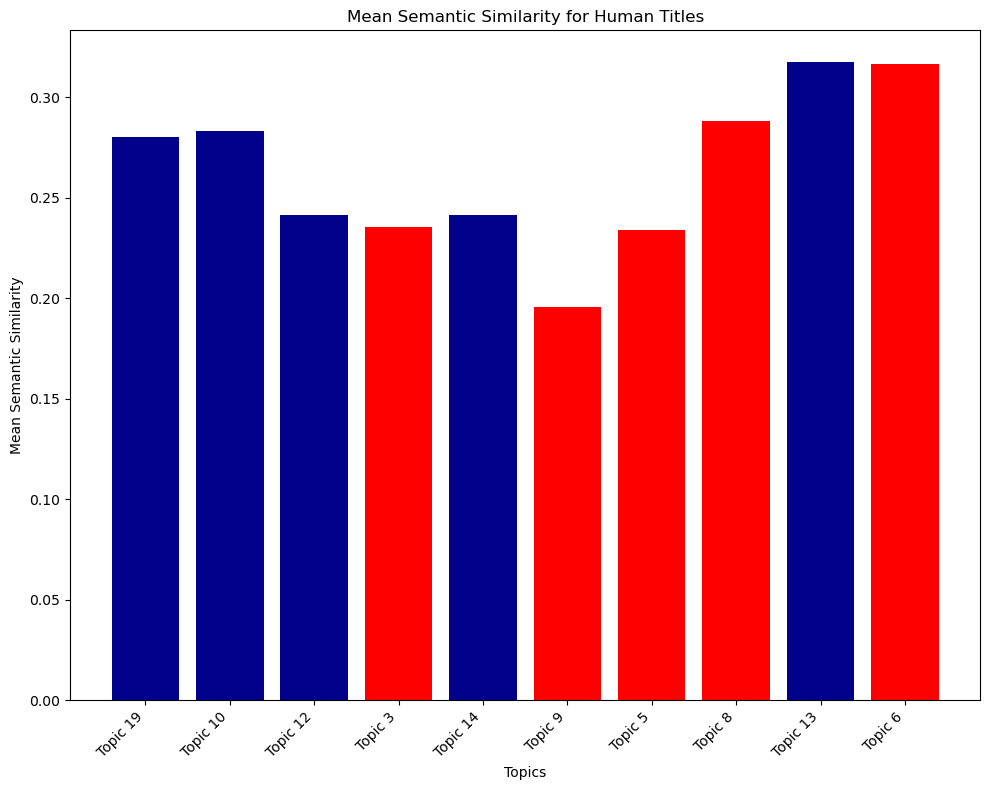

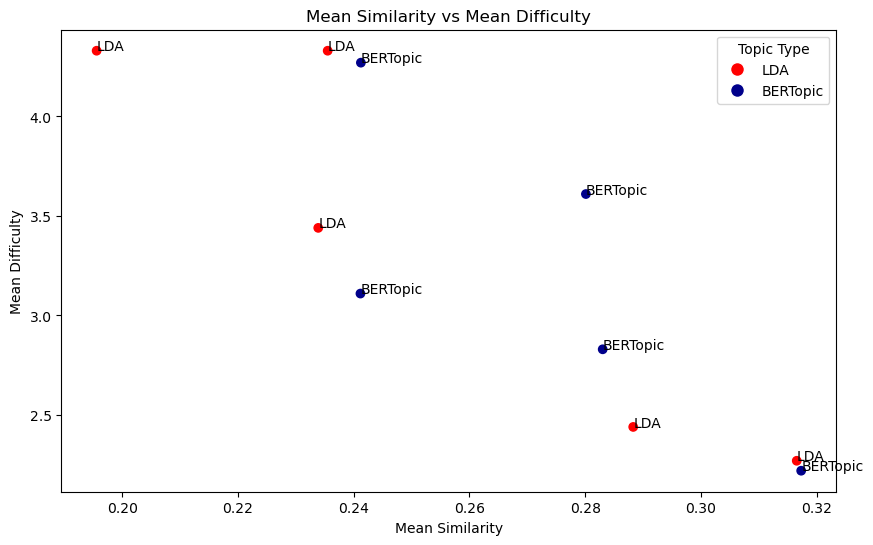

In [6]:
import matplotlib.pyplot as plt


topic_order = [19, 10, 12, 3, 14, 9, 5, 8, 13, 6]  
topics_descriptors = [f'Topic {i}' for i in topic_order]  
colors = ['darkblue' if i in [19, 10, 12, 14, 13] else 'red' for i in topic_order]

plt.figure(figsize=(10, 8))
plt.bar(topics_descriptors, mean_similarities, color=colors)
plt.xlabel('Topics')
plt.ylabel('Mean Semantic Similarity')
plt.title('Mean Semantic Similarity for Human Titles')
plt.xticks(rotation=45, ha='right')  # again, better visibility
plt.tight_layout()
plt.show()

mean_difficulties = [3.61, 2.83, 4.27, 4.33, 3.11, 4.33, 3.44, 2.44, 2.22, 2.27]


labels = ['LDA' if i in [3, 5, 6, 7, 9] else 'BERTopic' for i in range(10)]

fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(mean_similarities, mean_difficulties, c=colors, label=labels)


for i, txt in enumerate(labels):
    ax.annotate(txt, (mean_similarities[i], mean_difficulties[i]))

ax.set_xlabel('Mean Similarity')
ax.set_ylabel('Mean Difficulty')
ax.set_title('Mean Similarity vs Mean Difficulty')


legend_labels = ["LDA", "BERTopic"]
legend_colors = ['red', 'darkblue']
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in legend_colors]
ax.legend(legend_handles, legend_labels, title='Topic Type')

plt.show()


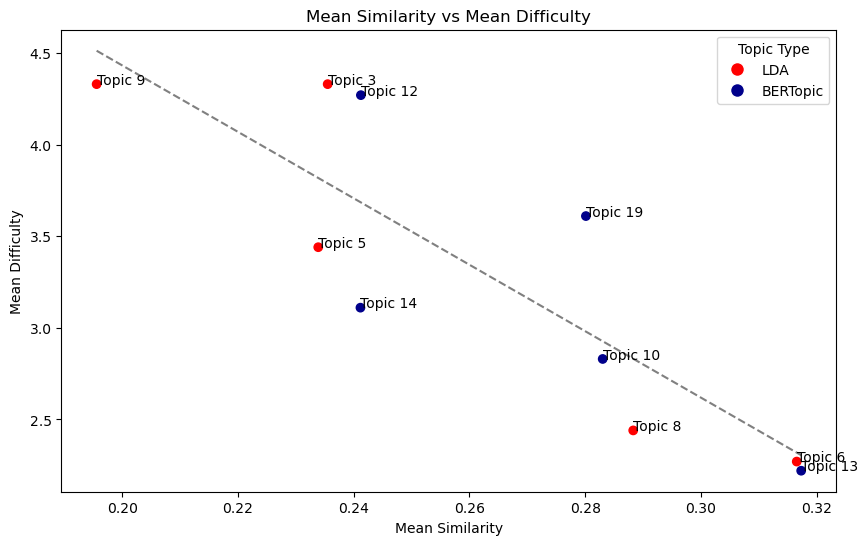

Slope (inversely proportional coefficient): -18.137465


In [22]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# Linear regression model
X = np.array(mean_similarities).reshape(-1, 1)
y = mean_difficulties
reg = LinearRegression().fit(X, y)
line_x = np.linspace(min(mean_similarities), max(mean_similarities), 100).reshape(-1, 1)
line_y = reg.predict(line_x)

colors = ['darkblue' if i in [0, 1, 2, 4, 8] else 'red' for i in range(10)]
labels = ['Topic ' + str(i) for i in [19, 10, 12, 3, 14, 9, 5, 8, 13, 6]]  # Updated labels


fig, ax = plt.subplots(figsize=(10, 6))
scatter = ax.scatter(mean_similarities, mean_difficulties, c=colors, label=labels)


ax.plot(line_x, line_y, color='grey', linestyle='--', label='Inversely Proportional Line')


for i, txt in enumerate(labels):
    ax.annotate(txt, (mean_similarities[i], mean_difficulties[i]))

ax.set_xlabel('Mean Similarity')
ax.set_ylabel('Mean Difficulty')
ax.set_title('Mean Similarity vs Mean Difficulty')

# Legends
legend_labels = ["LDA", "BERTopic"]
legend_colors = ['red', 'darkblue']
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color, markersize=10) for color in legend_colors]
ax.legend(legend_handles, legend_labels, title='Topic Type')

plt.show()


scores = reg.coef_
print("Slope (inversely proportional coefficient):", scores[0])


In [1]:
# KEYWORD SELECTION

In [17]:
human_topic_0 = ['nurse', 'nursing', 'medical', 'springborg', 'clinic', 'moura', 'bed', 'elective', 'payroll', 'doctor']
human_topic_1 = ['armed','robbery', 'sexual', 'cannabis', 'priest', 'bikie', 'robber', 'bikies', 'offender', 'bashing']
human_topic_2 = ['mariner','rooster','bulldog','eagle','nrl','brumbies','bronco','wanderer','roar','knight']
human_topic_3 = ['interview', 'dai', 'speak', 'test','win','ash','pacif','australia','final','beat']
human_topic_4 = ['dam','irrigation','flooding','levee','mitigation','allocation','floodwaters','sewerage','basin','flash']
human_topic_5 = ['win', 'ban', 'afl', 'take','race','call','week','set','black','tour']
human_topic_6 = ['crash', 'countri', 'kill', 'coast','hit','hour','car','di','train','fire']
human_topic_7 = ['polic', 'charg', 'court', 'murder','accus','jail','trial','arrest','drug','assault']
human_topic_8 = ['trent','robinson','griffin','elliott','extended','josh','wayne','bennett','johnathan','matthew']
human_topic_9 = ['farmer', 'nrn', 'farm', 'cattl','rain','dairi','export','food','drought','grower']

participant_keywords_0 = [
    "clinic medical", "medical nursing", "bed nursing", "nurse doctor", "nursing doctor",
    "nursing medical", "clinic medical", "payroll medical", "nursing nurse", "nursing medical",
    "clinic medical", "clinic medical", "medical doctor", "nursing medical", "medical payroll",
    "nursing medical", "nursing medical", "payroll medical"
]

participant_keywords_1 = [
    "offender robbery", "robbery offender", "offender robber", "robbery robber", "robbery offender",
    "armed robbery", "offender robbery", "offender robbery", "robbery offender", "robbery offender",
    "offender robbery", "robber robbery", "robbery armed", "offender priest", "priest offender",
    "offender bikies", "armed robbery", "cannabis offender"
]

participant_keywords_2 = [
    "rooster bulldog", "bulldog wanderer", "brumbies eagle", "bulldog eagle", "rooster eagle",
    "nrl bronco", "bulldog wanderer", "eagle bulldog", "bronco eagle", "rooster nrl", "mariner eagle",
    "rooster bulldog", "bulldog eagle", "bulldog mariner", "bronco wanderer", "rooster eagle",
    "nrl brumbies", "bulldog roar"
]

participant_keywords_3 = [
    "ash australia", "test australia", "speak interview", "ash australia", "ash test", "test australia",
    "interview test", "win speak", "ash test", "interview speak", "win australia", "interview speak",
    "interview speak", "ash test", "interview speak", "ash test", "test final", "interview australia"
]

participant_keywords_4 = [
    "floodwaters flooding", "flooding mitigation", "mitigation floodwaters", "flooding flash",
    "flooding dam", "irrigation floodwaters", "irrigation flooding", "flooding irrigation",
    "sewerage irrigation", "floodwaters flooding", "sewerage flooding", "basin dam", "dam flooding",
    "irrigation sewerage", "sewerage irrigation", "floodwaters flooding", "flash flooding", "sewerage flooding"
]

participant_keywords_5 = [
    "race win", "race ban", "tour race", "race win", "race tour", "tour win", "race ban", "win race",
    "race win", "race call", "race set", "tour win", "tour race", "tour afl", "tour race", "afl win",
    "afl ban", "week race"
]

participant_keywords_6 = [
    "train car", "crash kill", "crash fire", "kill crash", "crash car", "crash fire", "crash fire",
    "fire crash", "fire crash", "hit train", "crash fire", "hit crash", "crash fire", "train hour",
    "crash car", "kill crash", "kill crash", "train kill"
]

participant_keywords_7 = [
    "arrest court", "court trial", "jail arrest", "murder assault", "court trial", "trial court",
    "court arrest", "court arrest", "court murder", "trial court", "jail court", "assault murder",
    "assault murder", "charg court", "charg court", "trial court", "trial jail", "court assault"
]

participant_keywords_8 = [
    "wayne johnathan", "griffin robinson", "wayne matthew", "wayne matthew", "johnathan matthew",
    "matthew johnathan", "johnathan matthew", "griffin wayne", "matthew wayne", "wayne josh",
    "josh trent", "johnathan robinson", "johnathan elliott", "josh wayne", "griffin bennett",
    "matthew josh", "wayne bennett", "trent extended"
]

participant_keywords_9 = [
    "farm farmer", "farm drought", "food farmer", "farm cattl", "farm food", "grower farmer",
    "farmer farm", "farmer food", "farm farmer", "farm farmer", "grower farmer", "farm grower",
    "food farmer", "farmer farm", "farmer grower", "farmer farm", "food drought", "farm rain"
]


In [18]:
def evaluate_topic(human_topic, participant_keywords):
    total_score = 0 

    for keyword in participant_keywords:
        first_word, second_word = keyword.split()
        
        # Calculating the score for the first word
        first_word_score = human_topic.index(first_word)
        
        # Calculating the score for the second word
        if second_word == human_topic[0]:
            second_word_score = 0
        else:
            second_word_score = human_topic.index(second_word) - 1
        
        # Adding the scores to total_score
        total_score += (first_word_score + second_word_score)

    mean_score = total_score / len(participant_keywords)
    return mean_score


In [20]:
human_topics = [
    human_topic_0, human_topic_1, human_topic_2, human_topic_3,
    human_topic_4, human_topic_5, human_topic_6, human_topic_7,
    human_topic_8, human_topic_9
]

# List of participant keywords for each topic
participant_keywords = [
    participant_keywords_0, participant_keywords_1, participant_keywords_2,
    participant_keywords_3, participant_keywords_4, participant_keywords_5,
    participant_keywords_6, participant_keywords_7, participant_keywords_8,
    participant_keywords_9
]


for i in range(10):
    mean_score = evaluate_topic(human_topics[i], participant_keywords[i])
    mean_keywords.append(mean_score)
    print(f"Mean score for topic {i}:", mean_score)

Mean score for topic 0: 5.166666666666667
Mean score for topic 1: 7.555555555555555
Mean score for topic 2: 5.5
Mean score for topic 3: 5.944444444444445
Mean score for topic 4: 6.277777777777778
Mean score for topic 5: 7.222222222222222
Mean score for topic 6: 6.888888888888889
Mean score for topic 7: 7.611111111111111
Mean score for topic 8: 10.61111111111111
Mean score for topic 9: 5.833333333333333


In [24]:
bertopic_indexes = [0, 1, 2, 4, 8]

ldatopic_indexes = [3, 5, 6, 7, 9]


bertopic_sum = 0
ldatopic_sum = 0
bertopic_count = 0
ldatopic_count = 0


for i, mean_score in enumerate(mean_keywords):
    if i in bertopic_indexes:
        bertopic_sum += mean_score
        bertopic_count += 1
    elif i in ldatopic_indexes:
        ldatopic_sum += mean_score
        ldatopic_count += 1

# Averages for BERTopic and LDAtopic
average_bertopic = bertopic_sum / bertopic_count
average_ldatopic = ldatopic_sum / ldatopic_count

print("Average mean score for BERTopic topics:", average_bertopic)
print("Average mean score for LDAtopic topics:", average_ldatopic)


Average mean score for BERTopic topics: 7.022222222222223
Average mean score for LDAtopic topics: 6.7
